### BRIEF binary descriptor
[link to example](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_brief.html#sphx-glr-auto-examples-features-detection-plot-brief-py)

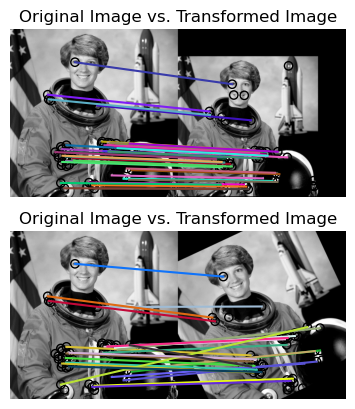

In [4]:
from skimage import data, transform
from skimage.feature import (
    match_descriptors, corner_peaks, corner_harris,
    plot_matches, BRIEF
)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img_1 = rgb2gray(data.astronaut())
tform = transform.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_2 = transform.warp(img_1, tform)
img_3 = transform.rotate(img_1, 25)

keypoints_1 = corner_peaks(corner_harris(img_1), min_distance=5, threshold_rel=0.1)
keypoints_2 = corner_peaks(corner_harris(img_2), min_distance=5, threshold_rel=0.1)
keypoints_3 = corner_peaks(corner_harris(img_3), min_distance=5, threshold_rel=0.1)

extractor = BRIEF()

extractor.extract(img_1, keypoints_1)
keypoints_1 = keypoints_1[extractor.mask]
descriptors_1 = extractor.descriptors

extractor.extract(img_2, keypoints_2)
keypoints_2 = keypoints_2[extractor.mask]
descriptors_2 = extractor.descriptors

extractor.extract(img_3, keypoints_3)
keypoints_3 = keypoints_3[extractor.mask]
descriptors_3 = extractor.descriptors

matches_1_to_2 = match_descriptors(descriptors_1, descriptors_2, cross_check=True)
matches_1_to_3 = match_descriptors(descriptors_1, descriptors_3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)
plt.gray()

plot_matches(ax[0], img_1, img_2, keypoints_1, keypoints_2, matches_1_to_2)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], img_1, img_3, keypoints_1, keypoints_3, matches_1_to_3)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")

plt.show()